In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Understanding Activations

#### Sigmoid:
- sigmoid(x) = 1/(1 + exp(-x))
- output in range (0, 1)
- 'Gradient killing' - as sigmoid saturates to 0 or 1, the derivative of sigmoid, which is sigmoid\*(1-sigmoid), saturates to 0 (not a perfect 0 though like ReLU), hence the backpropagating gradients gets scaled to a very low value almost close to 0 (killed!).
- To prevent Gradient killing or saturation of neurons as such, |W.X| should be very small:
    - so weights should be initialized to small values
    - preferable to have X zero centered and having small values (between 0 and 1)
- not zero centered

#### Tanh:
- tanh(x) = 2 * sigmoid(2x) - 1  (scaled sigmoid)
- output in range (-1, 1)
- 'Gradient killing'
- zero centered

#### ReLU:
- relu(x) = max(0, x)
- Can accelerate convergence compared to sigmoid, tanh. This is because it is non-saturating unlike sigmoid, tanh.
- Dying ReLU units - it is a similar problem like sigmoid and tanh but more grave.
    - Derivative of ReLU = 1 when x >= 0, hence a large negative gradient propagating backwards can update weights such that they never activate the ReLu neuron again. Hence, from the next iteration, x will always be < 0, therefore derivative of ReLU = 0, and hence there would be no more weight updates. This usually happens when learning rate is set high.
- Need to set learning rates low to avoid Dying ReLU units.
- not zero centered


#### Leaky ReLU
- leaky_relu(x) = 1(x < 0)(alpha * x) + 1(x >= 0)(x) or if x < 0, then multiply x with alpha, else do nothing
- So for negative x, we won't have a perfect 0, hence for the dying units case explained above, derivative of leaky ReLU = alpha when x < 0, therefore the weights will continue getting updated.
- Is is better than ReLU? - inconsistent results.


#### Maxout
- maxout(W1.X, W2.X) = max(W1.X, W2.X)
- general form of ReLU. Has all advantages of ReLU but no disadvantages.
- problem is twice the number of parameters - W1, W2 instead of just W.
- the derivate computation is based on the explanation in https://www.reddit.com/r/MachineLearning/comments/2vl8hp/a_question_about_maxout_who_gets_the_error/


#### pReLU ?

#### ReLU > Tanh > Sigmoid
- Use ReLU. Ensure learning rates are small and monitor number of dead neurons.
- d_* are the derivative functions of the activation functions
- Below, the alternative versions are the slower versions - important to %timeit on large matrices

In [95]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.tanh(x)**2

def tanh_alt(x):
    return 2 * sigmoid(2 * x) - 1

def d_tanh_alt(x):
    return 4 * d_sigmoid(2 * x)

def ReLU(x):
    return np.clip(x, 0, np.max(x))

def d_ReLU(x):
    y = ReLU(x)
    y[x >= 0] = 1
    return y

def leaky_ReLU(x, alpha=0.01):
    alpha_array = np.ones(x.shape, dtype=float)
    alpha_array[x < 0] = alpha
    return alpha_array * x

def d_leaky_ReLU(x, alpha=0.01):
    alpha_array = np.ones(x.shape, dtype=float)
    alpha_array[x < 0] = alpha
    return alpha_array

def maxout(x, y):
    return np.maximum(x, y)

def d_maxout(x, y):
    x_ret = np.zeros(x.shape, dtype=float)
    y_ret = np.zeros(x.shape, dtype=float)    
    x_ret[x >= y] = 1
    y_ret[y >= x] = 1
    return x_ret, y_ret

In [52]:
def plot_activation_and_derivative(activation_func, d_activation_func):
    X = np.arange(-10, 10, 0.1)
    y = activation_func(X)
    dy = d_activation_func(X)
    plt.plot(X, y, c='b', label='activation')
    plt.plot(X, dy, c='r', label='derivative')
    plt.legend()

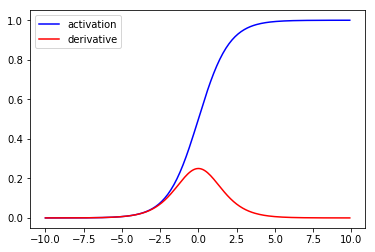

In [53]:
plot_activation_and_derivative(sigmoid, d_sigmoid)

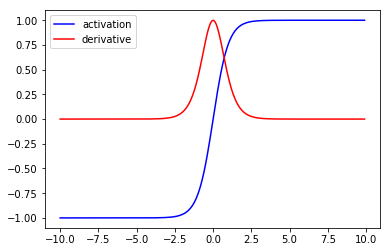

In [54]:
plot_activation_and_derivative(tanh, d_tanh)

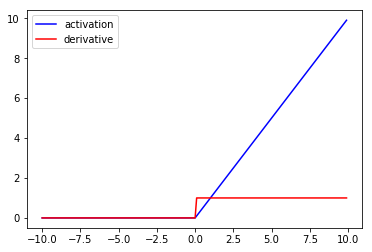

In [77]:
plot_activation_and_derivative(ReLU, d_ReLU)

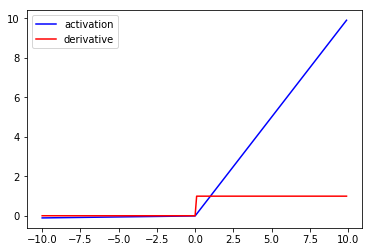

In [86]:
plot_activation_and_derivative(leaky_ReLU, d_leaky_ReLU)